In [2]:
%reload_ext autoreload
%autoreload 2

from src.db import DB
import pandas as pd
import matplotlib as mpl

In [16]:
DB().picklize()

In [17]:

adjclose = pd.read_pickle('static/kospi_adjclose.pkl')

In [16]:
from src.backtest import backtest
from src.pattern import all as all_pattern

result = backtest(all_pattern, start_date="2000-01-01", end_date="2000-01-31")
result

codes:   0%|          | 0/1136 [00:00<?, ?code/s]

,count,arith_mean,geom_mean
period,,,
1D,14658,-0.000952,-0.002469
1W,14654,0.004000,-0.002957
2W,14647,-0.008324,-0.019979
3W,14637,-0.022393,-0.036811
6W,14620,0.046357,-0.003641
3M,14598,-0.014978,-1.000000
6M,14460,-0.131298,-1.000000


<Axes: xlabel='period'>

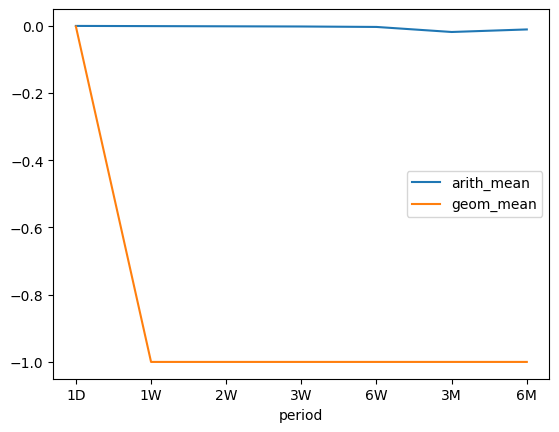

In [13]:
result[['arith_mean', 'geom_mean']].plot()